<a href="https://colab.research.google.com/github/giuliafazzi/adversarial-attacks/blob/main/Adversarial_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adversarial Attacks**

## **Setup environment**

### **Import libraries**

In [3]:
from torchvision import models
import torch
from torchvision.io.image import read_image
from torchvision.transforms.functional import to_pil_image


from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

## **Define function**

In [4]:
def show(image):
  img = image.detach()
  img = to_pil_image(img)
  plt.imshow(np.asarray(img))
  plt.axis('off')
  plt.tight_layout()
  plt.show()

## **Image Classifier**

In [5]:
class ResNet50:
  def __init__(self, train = False):
    self.weights = models.ResNet50_Weights.DEFAULT
    self.model = models.resnet50(weights=self.weights)
    self.set_device()

    if not train:
      self.eval_model()

  def set_device(self):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.model.to(device)

  def preprocess(self, image):
    preprocess = self.weights.transforms(antialias=True)

    return preprocess(image)

  def eval_model(self):
    self.model.eval()

  def predict(self, image, k = 5):
    batch = self.preprocess(image).unsqueeze(0)
    prediction = self.model(batch).squeeze(0).softmax(0)

    k_probs, k_ids = torch.topk(prediction, k)

    for conf, cat_id in zip(k_probs, k_ids):
      print(f'Confidence {conf:.2%}\tCategory: {self.weights.meta["categories"][cat_id]}')

## **Testing**

In [9]:
resnet = ResNet50()

In [7]:
img = read_image("data/pizza.jpg")
resnet.predict(img)

Confidence 40.91%	Category: pizza
Confidence 0.40%	Category: umbrella
Confidence 0.34%	Category: sundial
Confidence 0.32%	Category: frying pan
Confidence 0.29%	Category: wall clock


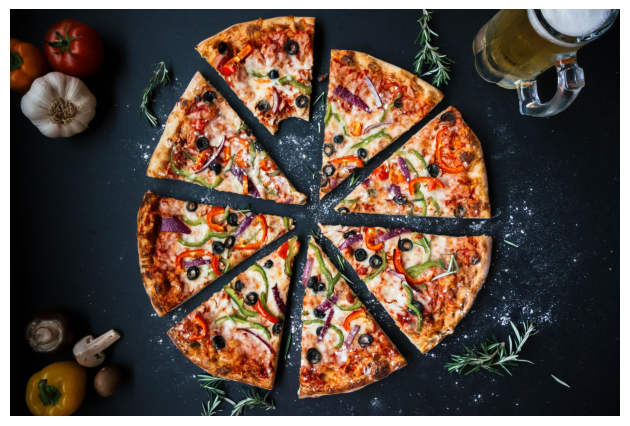

In [8]:
show(img)